<a href="https://colab.research.google.com/github/anteaterst/Data_analytics-1109-1209/blob/main/%EA%B0%80%EA%B2%A9%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#중고 휴대폰 가격 분석
# create_date 판매글 올라온 날짜
# price 가격
# text 게시글
# phone_model 휴대폰 기종
# factory_price 원래가격(공정가)
# maker 휴대폰 제조사
# price_index 판매글 올라온 시점의 물가 지수

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("used_mobile_phone.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4951 entries, 0 to 4950
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   create_date    4951 non-null   object 
 1   price          4951 non-null   float64
 2   text           4951 non-null   object 
 3   phone_model    4951 non-null   object 
 4   factory_price  4951 non-null   int64  
 5   maker          4951 non-null   object 
 6   price_index    4951 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 270.9+ KB
None


,create_date,price,text,phone_model,factory_price,maker,price_index
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05
3,2017-03-23 11 14 00 PM,290000.0,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...,lg g5 32gb,836000,lg,95.96
4,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...,lg u 32gb,396000,lg,102.59


In [ ]:
df['month'] = df['create_date'].apply(lambda x: x[:7])

In [ ]:
df['month'].value_counts()

# 이 데이터는 2016 10 2017 3월에 집중적으로 판매가 이루어졌다.

2016-10    2956
2017-03    1311
2016-08     107
2016-09     105
2016-04     102
2016-05      89
2016-06      76
2016-07      74
2016-03      70
2016-02      61
Name: month, dtype: int64

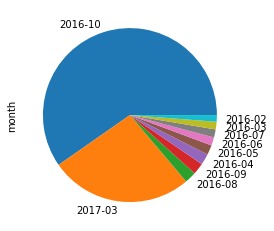

In [ ]:
df['month'].value_counts().plot.pie()

In [ ]:
df_day = pd.to_datetime(df['create_date'].apply(lambda x: x[:10])).value_counts()

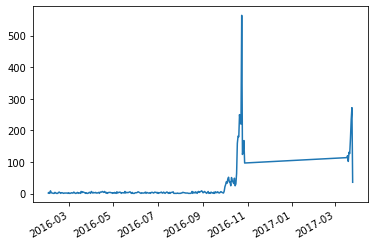

In [ ]:
df_day.plot()
#데이터의 개수를 일자별 시계열 그래프로 나타냈다. 

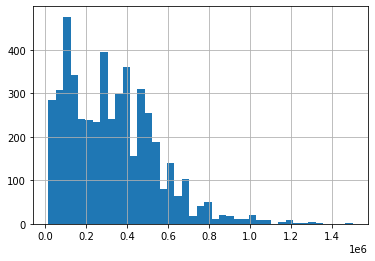

In [ ]:
df['price'].hist(bins='auto')
#거래되고 있는 중고 폰들의 가격이 60만원 이하의 가격대를 형성하고 있다. 

In [ ]:
# 동길 기종 내에서의 가격 분포를 살펴보자. 이를 위해 phone_model 을 groupby 계산해보자 
df_price_model_mean = df.groupby('phone_model')['price'].transform(lambda x: np.mean(x))

In [ ]:
df_price_model_std = df.groupby('phone_model')['price'].transform(lambda x: np.std(x))

In [ ]:
# z-score 해당 값이(가격) 평균에 비해 어느 정도 높거나 낮은지를 알 수 있다.
# z-score = (값 - 평균) / 표준 편차

In [ ]:
df_price_model_z_score = (df['price']-df_price_model_mean)/df_price_model_std

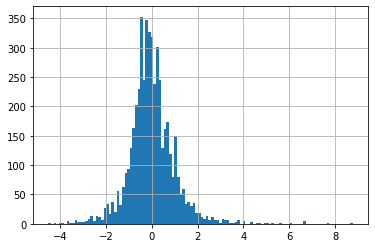

In [ ]:
df_price_model_z_score.hist(bins='auto')

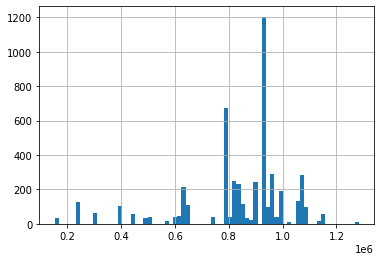

In [ ]:
# factory_price 의 분포 price 와의 관계를 탐색
df['factory_price'].hist(bins='auto')

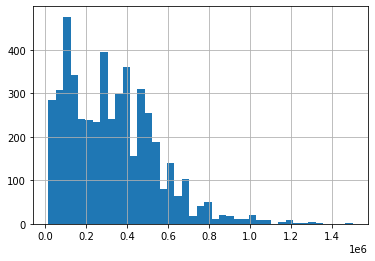

In [ ]:
df['price'].hist(bins='auto')

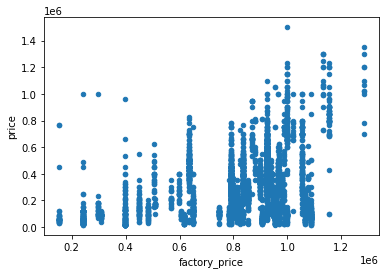

In [ ]:
df.plot.scatter(x='factory_price', y = 'price')

# 두 피처의 값들이 양의 상관 관계를 가지고 있다.
# factory_price는 중고 가격에 중요한 영향을 미칠 것이다. 라고 추정해볼 수 있다.

In [ ]:
# 기종 별 총 거래 개수를 집계한다

model_counts = df['phone_model'].value_counts()
print(model_counts)

iphone 6 64gb          1002
iphone 6 16gb           591
galaxy note3 32gb       231
iphone se 64gb          216
galaxy note5 32gb       167
                       ... 
iphone 7 plus 32gb       12
iphone 6s Plus 16gb      12
iphone 4s 16gb           11
iphone 7 plus 256gb      11
iphone 6 32gb            10
Name: phone_model, Length: 64, dtype: int64


{'boxes': [<matplotlib.lines.Line2D at 0x7fb856f0b630>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb856f1c080>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb856f1cb00>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb856f1c780>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb856f0b940>,
  <matplotlib.lines.Line2D at 0x7fb856f0bcc0>]}

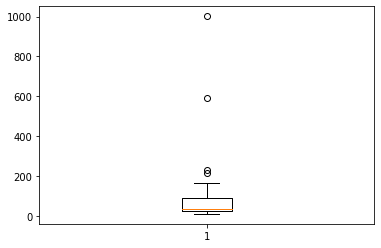

In [ ]:
plt.boxplot(model_counts)

Text(0.5, 1.0, 'min seong')

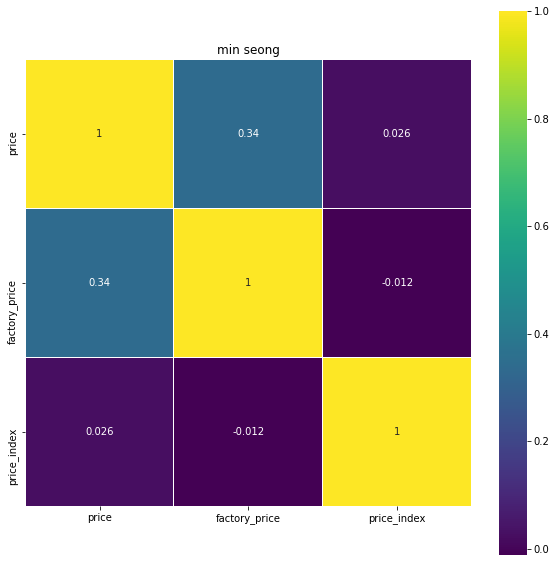

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), linewidths=0.01, square = True,
            annot = True, cmap=plt.cm.viridis, linecolor="white")
plt.title('min seong')



 랜덤 포레스트 모델 (random Froest Model) 


# 의사결정나무 (Decision Tree Model) 모델을 응용 한 것으로 의사 결정 나무를 여러개 모아 하나의 숲을 구성하는 방법, 하나의 모델이 정답을 푸는 게 아닌여러개의 모델이 정답을 함께 푸는 것 이기 때문에 더 정확한 학습이 가능하다 또한 이방법은 모델이 생성되는 과정에서의 피처 중요도 까지 계산하기 때문에 탐색적 분석 작업에서 아주 많이 사용 되는 모델이다. 회귀 분류 두가지에 모두 사용된다 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


# 데이터를 학습 / 테스트 용으로 분리한다 
df = df[['price','phone_model','factory_price','maker','price_index','month']]

In [ ]:
df = pd.get_dummies(df, columns=['phone_model','maker','month'])
X = df.loc[:,df.columns != 'price']
y = df['price']
# 트레이닝 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=0)
# 모델 사용
forest = RandomForestRegressor(n_estimators=1000,
                               criterion='mse')
forest.fit(X_train, y_train)

y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

df = pd.read_csv("used_mobile_phone.csv")
print(df.info())
df.head()
df['month'] = df['create_date'].apply(lambda x: x[:7])


# 데이터를 학습/테스트용 데이터로 분리합니다.
df = df[['price', 'phone_model', 'factory_price', 'maker', 'price_index', 'month']]
df = pd.get_dummies(df, columns=['phone_model', 'maker', 'month'])
X = df.loc[:, df.columns != 'price']
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 랜덤 포레스트 모델을 학습합니다.
forest = RandomForestRegressor(n_estimators=1000,
                               criterion='mse')
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

# 학습한 모델을 평가합니다.
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4951 entries, 0 to 4950
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   create_date    4951 non-null   object 
 1   price          4951 non-null   float64
 2   text           4951 non-null   object 
 3   phone_model    4951 non-null   object 
 4   factory_price  4951 non-null   int64  
 5   maker          4951 non-null   object 
 6   price_index    4951 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 270.9+ KB
None
MSE train: 10630348012.875, test: 13859654316.449
R^2 train: 0.781, test: 0.683


<BarContainer object of 84 artists>

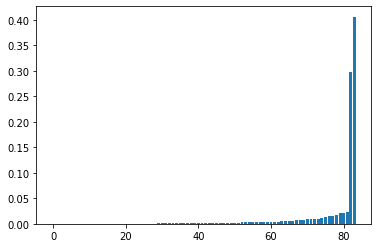

In [ ]:
#피처 값들의 중요도를 분석

importances = forest.feature_importances_
indices = np.argsort(importances)

plt.bar(range(X.shape[1]),importances[indices])

In [ ]:
#피처값들의 중요도 출력
feat_labels = X.columns.tolist()
feature = list(zip(feat_labels, forest.feature_importances_))
sorted(feature, key=lambda tup: tup[1], reverse=True)[:10]

[('factory_price', 0.4062557440414678),
 ('maker_apple', 0.2973131649317375),
 ('phone_model_galaxy s3 3g 8gb', 0.022232410152033158),
 ('phone_model_iphone se 64gb', 0.0214146046083154),
 ('price_index', 0.020668029769799614),
 ('phone_model_galaxy s4 32gb', 0.017363722904626067),
 ('maker_samsung', 0.01511237686432063),
 ('month_2017-03', 0.014858653730083805),
 ('phone_model_galaxy s6 32gb', 0.012488758059955378),
 ('month_2016-05', 0.010789701543459245)]

In [ ]:
# 피처의 값등 중에서 영향력이 높은 순으로 출력
for sorted_feature in sorted(feature, key=lambda tup: tup[1], reverse=True):
  if "month" in sorted_feature[0]:
    print(sorted_feature)

('month_2017-03', 0.014858653730083805)
('month_2016-05', 0.010789701543459245)
('month_2016-09', 0.00836821198424645)
('month_2016-04', 0.007648198460488991)
('month_2016-10', 0.0062316825156532515)
('month_2016-06', 0.004495239844856231)
('month_2016-08', 0.003787353528433887)
('month_2016-07', 0.0027190003967303704)
('month_2016-03', 0.002284510804802285)
('month_2016-02', 0.001082765881407478)


In [ ]:
# #데이터 분석 결과 종합

# 피처
# date : 월 단위로 살펴본 결과 2016년 10월과 17년 3월의 데이터가 가장 많다. 
#        최근에 가까운 달일 수록 중요한 피처이다. 

# price : 전체 휴대폰의 거래가격과 달리 기종별 가격의 분포는 정규분포 
#         형태를 띠고 있다. 

# factory_price : price 피처와 양의 상관관계, 가장 중요한 피처 
# phone_model : 소수의 인기 기종이 많은 데이터를 가지고 있다. 
# maker :Apple 브랜드가 가장 많고 가격 예측에서도 Apple은 중요한 피처 중 하나
# price_index : 월별 변동은 크지 않고 그다지 중요한 피처도 아니다. 물가는 중고가 형성에 있어서 영향이 없다 


In [ ]:
#데이터 분석 개선

# phone_model 이 제품명 + 용량으로 구성되어 있어서 이것을 나누면 2개의 분리된 피처를 얻을 수 있다.


In [ ]:
df = df[['price','phone_model','factory_price','maker','price_index','month']]
df['phone_model_storage'] = df['phone_model'].apply(lambda x: x.split(" ")[-1])